<a href="https://colab.research.google.com/github/Avinash-koduri/TXON_01/blob/main/practice_program3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/image classification 3/dataset2'
train='/content/drive/MyDrive/image classification 3/dataset2/training'
test='/content/drive/MyDrive/image classification 3/dataset2/test'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=1/255)
train =train_gen.flow_from_directory(train,target_size=(64,64),batch_size=4,class_mode='categorical')

Found 690 images belonging to 3 classes.


In [ ]:
test_gen = ImageDataGenerator(rescale=1/255)
test =test_gen.flow_from_directory(test,target_size=(64,64),batch_size=4,class_mode='categorical')

Found 725 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten

In [ ]:
model=Sequential()
model.add(Dense(128,input_shape=(64,64,3)))
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(80,activation='relu'))
model.add(Dense(60,activation='softmax'))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(x=train,validation_data=test,epochs=25)

Epoch 1/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 30s 173ms/step - accuracy: 1.0000 - loss: 4.7996e-04 - val_accuracy: 1.0000 - val_loss: 3.7153e-04
Epoch 2/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 30s 172ms/step - accuracy: 1.0000 - loss: 3.6595e-04 - val_accuracy: 1.0000 - val_loss: 3.0113e-04
Epoch 3/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - accuracy: 1.0000 - loss: 2.8552e-04 - val_accuracy: 1.0000 - val_loss: 2.8410e-04
Epoch 4/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 43s 184ms/step - accuracy: 1.0000 - loss: 2.6041e-04 - val_accuracy: 1.0000 - val_loss: 2.8390e-04
Epoch 5/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 38s 169ms/step - accuracy: 1.0000 - loss: 2.6070e-04 - val_accuracy: 1.0000 - val_loss: 2.2410e-04
Epoch 6/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 30s 175ms/step - accuracy: 1.0000 - loss: 1.4406e-04 - val_accuracy: 1.0000 - val_loss: 2.1529e-04
Epoch 7/25
173/173 ━━━━━━━━━━━━━━━━━━━━ 40s 172ms/step - accuracy: 1.0000 - loss: 2.5587e-04 - val_accuracy: 1.0000 - val_loss: 1.8743e-04
Epoch 8/25
173/173 ━━━━━━━━

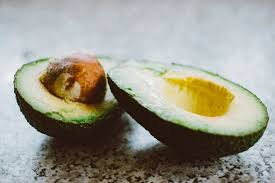

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
img =cv.imread('/content/drive/MyDrive/image classification 3/dataset2/test/avocado/img_1361.jpeg')
cv_imshow(img)

In [ ]:
test_img=cv.resize(img,(64,64))
test_input=test_img.reshape(1,64,64,3)

In [ ]:
value=model.predict(test_input)
model_predict_indices=np.argmax(value)
print(model_predict_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2


In [ ]:
train.class_indices

{'Apple': 0, 'Banana': 1, 'avocado': 2}

In [ ]:
class_indices=['Apple','Banana','Avacado']
p=class_indices[model_predict_indices]
print(p)

Avacado


In [ ]:
import matplotlib.pyplot as plt
plt.scatter('epochs','accuracy')
plt.title("model accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()